# Load Data

In [ ]:
import pandas as pd

final_data = pd.read_csv('aws demo pp fake review data.csv')

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    406 non-null    object
 1   rating      406 non-null    int64 
 2   label       406 non-null    int64 
 3   text_       406 non-null    object
 4   word_count  406 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.0+ KB


In [ ]:
final_data.head()

,category,rating,label,text_,word_count
0,Home_and_Kitchen_5,5,1,love well made sturdy comfortable love pretty,12
1,Home_and_Kitchen_5,5,1,love great upgrade original mine couple year,16
2,Home_and_Kitchen_5,5,1,pillow saved back love look feel pillow,14
3,Home_and_Kitchen_5,1,1,missing information use great product price,17
4,Home_and_Kitchen_5,5,1,nice set good quality set two month,18


# Word Embedding, Model Training and Evaluation

In [ ]:
# Create Feature and Label sets

X = final_data['text_']

y = final_data['label']




# train test split (80% train - 20% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (324,)
Testing Data :  (82,)


In [ ]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()

X_train_cv = count_vec.fit_transform(X_train)

X_train_cv.shape

(324, 733)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Train a LinearSVC model with hinge loss and l2 regularization
model = LinearSVC(loss='hinge', penalty='l2', C=0.15)
model.fit(X_train_cv, y_train)

# Calculate the training accuracy
y_pred_train = model.predict(X_train_cv)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Print the training accuracy
print('Training Accuracy:', train_accuracy)

Training Accuracy: 0.9475308641975309


In [ ]:
# check testing accuracy of the above model

# Calculate the testing accuracy
y_pred_test = model.predict(count_vec.transform(X_test))
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the testing accuracy
print('Testing Accuracy:', test_accuracy)


Testing Accuracy: 0.7073170731707317


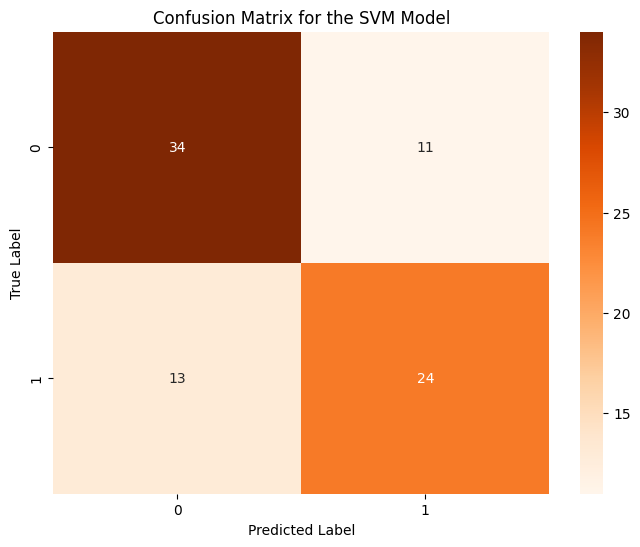

In [ ]:
# confusion matrix graph for above model orange

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create a bar chart for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the SVM Model')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.72      0.76      0.74        45
           1       0.69      0.65      0.67        37

    accuracy                           0.71        82
   macro avg       0.70      0.70      0.70        82
weighted avg       0.71      0.71      0.71        82

